<a href="https://colab.research.google.com/github/CooperFinn/Projects/blob/master/Data_Analysis/Automobile_Dataset_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <h1 align=center><font size = 6>Automobile Dataset Analysis with Python</font></h1>

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1. [**Data Wrangling**](#2)<br>
2. [**Data Analysis**](#4) <br>
3. [**Model Development**](#6) <br>
4. [**Model Evaluation and Refinement**](#6) <br>
</div>
<hr>

#1.Data Wrangling

In this section, we will convert  data from the initial format to a format that may be better for analysis.

**Automobile Dataset: **  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv


**Libraries:** Pandas、Numpy、Matplotlib、Seaborn、Scipy、Sklearn

 ## 1.1 Read the CSV file into DataFrame

In [0]:
# import library
import pandas as pd

# load data and set the parameter "names" equal to the list "headers"
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df=pd.read_csv('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/auto.csv',
              names=headers)

# display the first 2 rows of the dataframe
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


##1.2 Identify and handle missing values

###1.2.1 identify missing values

In [0]:
# replace "?" to NaN
import numpy as np
df.replace('?',np.nan,inplace=True)

# identify missing values
missing_data=df.isnull()

# count missing values
for column in missing_data.columns:
  print(column)
  print(missing_data[column].value_counts())
  print('')

Based on the summary above, each column has 205 rows of data, seven columns containing missing data:
<ol>
    <li>"normalized-losses": 41 missing data</li>
    <li>"num-of-doors": 2 missing data</li>
    <li>"bore": 4 missing data</li>
    <li>"stroke" : 4 missing data</li>
    <li>"horsepower": 2 missing data</li>
    <li>"peak-rpm": 2 missing data</li>
    <li>"price": 4 missing data</li>
</ol>

###1.2.2 Deal with missing data

<b>Replace by mean:</b>
<ul>
    <li>"normalized-losses": 41 missing data, replace them with mean</li>
    <li>"stroke": 4 missing data, replace them with mean</li>
    <li>"bore": 4 missing data, replace them with mean</li>
    <li>"horsepower": 2 missing data, replace them with mean</li>
    <li>"peak-rpm": 2 missing data, replace them with mean</li>
</ul>

<b>Replace by frequency:</b>
<ul>
    <li>"num-of-doors": 2 missing data, replace them with "four". 
        <ul>
            <li>Reason: 84% sedans is four doors. Since four doors is most frequent, it is most likely to occur</li>
        </ul>
    </li>
</ul>

<b>Drop the whole row:</b>
<ul>
    <li>"price": 4 missing data, simply delete the whole row
        <ul>
            <li>Reason: price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us</li>
        </ul>
    </li>
</ul>

In [0]:
# replace by mean
avg_normalized_losses=df['normalized-losses'].astype('float').mean()
df['normalized-losses'].replace(np.nan,avg_normalized_losses,inplace=True)
avg_stroke = df["stroke"].astype("float").mean()
df["stroke"].replace(np.nan, avg_stroke, inplace=True)
avg_bore=df['bore'].astype('float').mean()
df["bore"].replace(np.nan, avg_bore, inplace=True)
avg_horsepower = df["horsepower"].astype("float").mean()
df["horsepower"].replace(np.nan, avg_horsepower, inplace=True)
avg_peak_rpm = df["peak-rpm"].astype("float").mean()
df["peak-rpm"].replace(np.nan, avg_peak_rpm, inplace=True)

In [0]:
# replace by frequency
df['num-of-doors'].replace(np.nan,df['num-of-doors'].value_counts().idxmax(),inplace=True)

In [0]:
# drop the whole row
df.dropna(subset=["price"], axis=0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head(2)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500


###1.2.3 Correct data format

In [0]:
# check the data type
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [0]:
# covert data types to proper format
df[['bore','stroke','normalized-losses','price','peak-rpm','horsepower']]=df[['bore','stroke','normalized-losses','price','peak-rpm','horsepower']].astype('float')

# check the data type again
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

##1.3 Data Standardization

In [0]:
# Convert mpg to L/100km by mathematical operation (235 divided by mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# check your transformed data 
df[['city-L/100km',"city-mpg"]].head()

,city-L/100km,city-mpg
0,11.190476,21
1,11.190476,21
2,12.368421,19
3,9.791667,24
4,13.055556,18


##1.4 Data Normalization

In [0]:
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max() 

# show the scaled columns
df[["length","width","height"]].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


##1.5 Bins visualization

In [0]:
# build a bin array, with a minimum value to a maximum value, with bandwidth calculated above
bins=np.linspace(min(df['horsepower']),max(df['horsepower']),4)

# set group names
group_names=['Low','Medium','High']

# determine what each value of "df['horsepower']" belongs to
df['horsepower-binned']=pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)

Text(0.5, 1.0, 'horsepower bins')

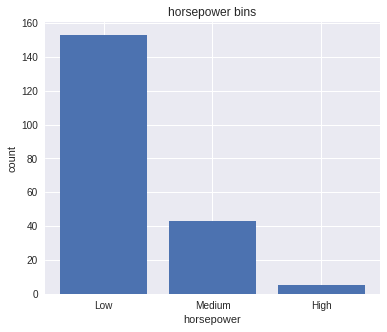

In [0]:
# import matplotlib library
import matplotlib as plt
from matplotlib import pyplot

# plot the distribution of each bin
plt.pyplot.figure(figsize=(6, 5))
pyplot.bar(group_names,df['horsepower-binned'].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

##1.6 dummy variable

In [0]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

#merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)

# view the first 2 rows
df.head(2)

,symboling,normalized-losses,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,aspiration-std,aspiration-turbo
0,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Low,1,0
1,3,122.0,alfa-romero,gas,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Low,1,0


#2.Data Analysis

In this section, we will explore several methods to see if certain characteristics or features can be used to predict car price.

##2.1 Analyzing Individual Feature Patterns using Visualization

###Continuous numerical variables

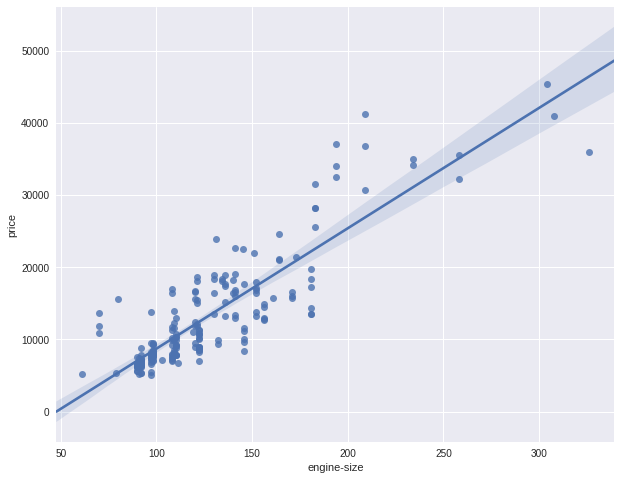

In [0]:
# Import visualization packages "Matplotlib" and "Seaborn"
import matplotlib.pyplot as plt
import seaborn as sns

# find the scatterplot of "engine-size" and "price"
plt.figure(figsize=(10, 8))
sns.regplot(x="engine-size", y="price", data=df)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

### Categorical variables

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


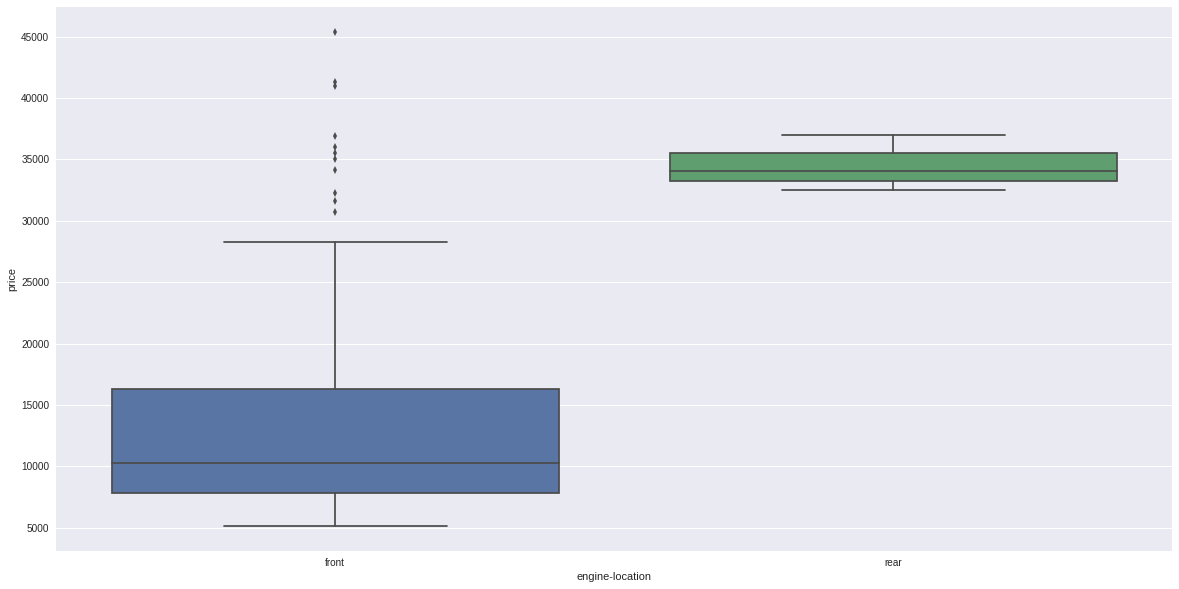

In [0]:
# look at the relationship between "engine-location" and "price"
plt.figure(figsize=(20, 10))
sns.boxplot(x="engine-location", y="price", data=df)

Here we see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

##2.2 Descriptive Statistical Analysis

In [0]:
# the default setting of "describe" skips variables of type object
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,9.944145,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,2.534599,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,4.795918,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,7.833333,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,9.791667,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,12.368421,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,18.076923,1.000000,1.000000


In [0]:
# convert the series to a Dataframe
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame() 

# rename the column 'drive-wheels' to 'value_counts'
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True) 

# rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [0]:
# select the columns 'drive-wheels', 'body-style' and 'price', then assign it to the variable "df_group_one"
df_gptest = df[['drive-wheels','body-style','price']]
# group 'drive-wheels'and'body-style', then average them
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


##2.3  Grouping

In [0]:
# convert the dataframe to a pivot table 
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
#  fill missing cells with the value 0
grouped_pivot = grouped_pivot.fillna(0)
grouped_pivot

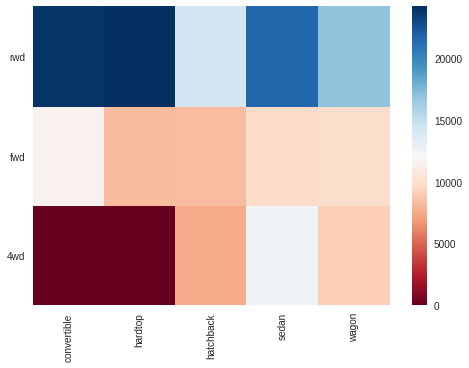

In [0]:
# use a heat map to visualize the relationship between Body Style vs Price
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')
#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index
#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)
#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)
#rotate label if too long
plt.xticks(rotation=90)
fig.colorbar(im)
plt.show()

##2.4. Correlation and Causation

In [0]:
# calculate the Pearson Correlation of the of the 'int64' or 'float64' variables
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,0.066171,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,0.238567,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.476153,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.657373,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.673363,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.003811,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.785353,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.745059,-0.110040,0.110040
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,0.001263,0.566936,-0.267392,-0.582027,-0.591309,0.543155,0.554610,-0.227816,0.227816
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.036133,-0.218233,0.218233


In [0]:
# calculate the Pearson Correlation Coefficient and P-value of 'horsepower' and 'price'
from scipy import stats
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P = ", p_value)  

The Pearson Correlation Coefficient is 0.8095745670036559  with a P-value of P =  6.36905742825998e-48


<h5>Conclusion:</h5>

<p>Since the p-value is $<$ 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)</p>

##2.5 Analysis of Variance

In [0]:
# see if different types 'drive-wheels' impact 'price'
grouped_test2=df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])

# use the function 'f_oneway' in the module 'stats' to obtain the F-test score and P-value
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val)

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


Conclusion: 

<p>We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:</p>

Continuous numerical variables:
<ul>
    <li>Length</li>
    <li>Width</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Horsepower</li>
    <li>City-mpg</li>
    <li>Highway-mpg</li>
    <li>Wheel-base</li>
    <li>Bore</li>
</ul>
    
Categorical variables:
<ul>
    <li>Drive-wheels</li>
</ul>

<p>As we now move into building machine learning models to automate our analysis, feeding the model with variables that meaningfully affect our target variable will improve our model's prediction performance.</p>

#3.Model Development

In this section, we will develop several models that will predict the price of the car using the variables or features. 

##3.1 Linear Regression and Multiple Linear Regression

###3.1.1 Linear Regression 

In [0]:
# load the modules for linear regression
from sklearn.linear_model import LinearRegression

# Train the model using 'highway-mpg' as the independent variable and 'price' as the dependent variable
reg=LinearRegression().fit(df[['highway-mpg']],df[['price']])

# Find the slope and intercept of the model,then output a prediction
print(reg.intercept_)
print(reg.coef_)
print(reg.predict(df[['highway-mpg']])[0:4])


As we saw above, we should get a final linear model with the structure: **Yhat = a + b  X**

Plugging in the actual values we get:   **<b>price</b> = 38423.31 - 821.73 x  <b>highway-mpg</b>**

###3.1.2 Multiple Linear Regression

<p>From the previous section  we know that other good predictors of price could be:</p>
<ul>
    <li>Horsepower</li>
    <li>Curb-weight</li>
    <li>Engine-size</li>
    <li>Highway-mpg</li>
</ul>

In [0]:
# develop a model using these variables as the predictor variables
# Fit the linear model using the four above-mentioned variables
reg=LinearRegression().fit(df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], df[['price']])

print(reg.intercept_)
print(reg.coef_)

[-15806.62462633]
[[53.49574423  4.70770099 81.53026382 36.05748882]]


As we saw above, we should get a final linear function with the structure:

$$
Yhat = a + b_1 X_1 + b_2 X_2 + b_3 X_3 + b_4 X_4
$$

<b>Price</b> = -15806.62462633 + 53.49574423 x <b>horsepower</b> + 4.70770099 x <b>curb-weight</b> + 81.53026382 x <b>engine-size</b> + 36.05748882 x <b>highway-mpg</b>

##3.2 Model Evaluation using Visualization

###3.2.1 Regression Plot

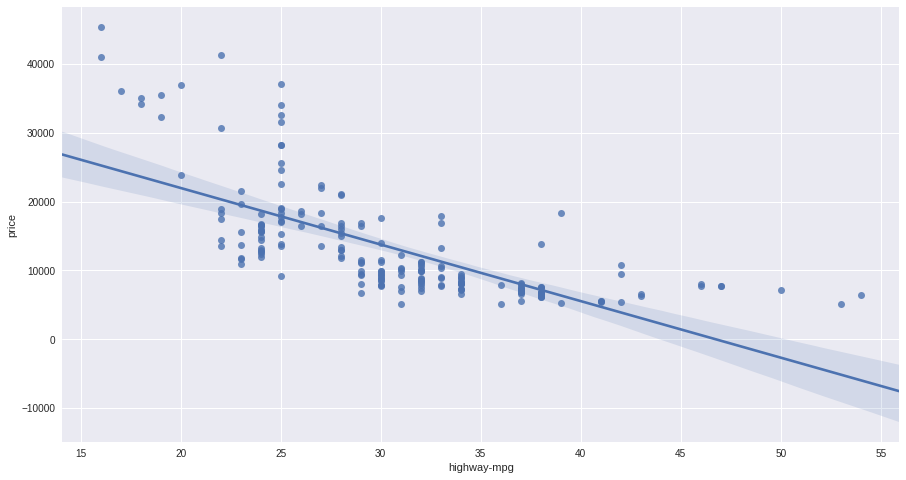

In [0]:
# visualize Horsepower as potential predictor variable of price
width = 15
height = 8
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)

###3.2.2 Residual Plot

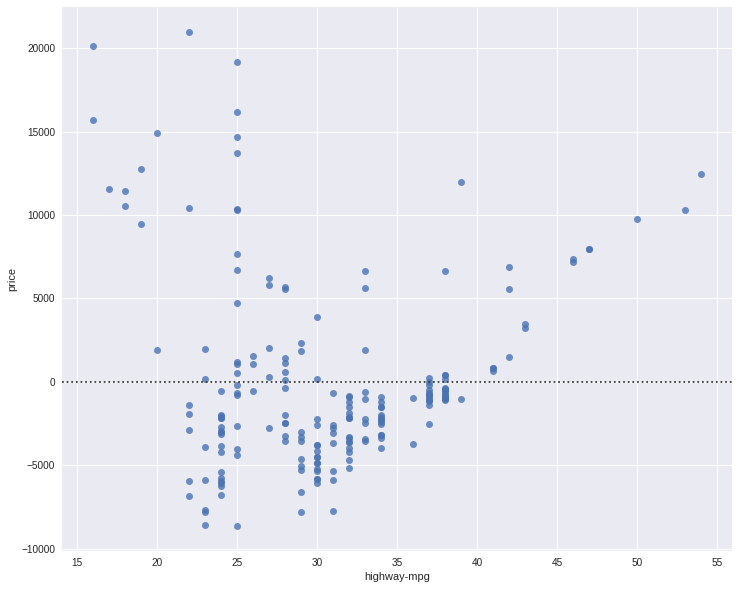

In [0]:
width = 20
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

###3.2.3 Multiple Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
Z=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
reg=LinearRegression().fit(Z,df[['price']])

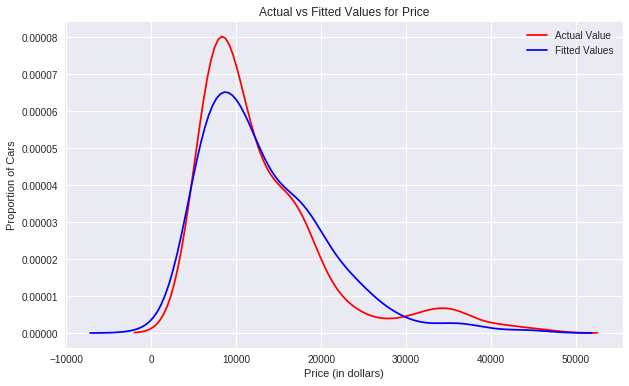

In [0]:
width = 10
height = 6
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(reg.predict(Z), hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

<p>The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:</p>

$$
Yhat = a + b_1 X_1 +b_2 X_2 +b_3 X_1 X_2+b_4 X_1^2+b_5 X_2^2
$$

##3.3 Polynomial Regression 

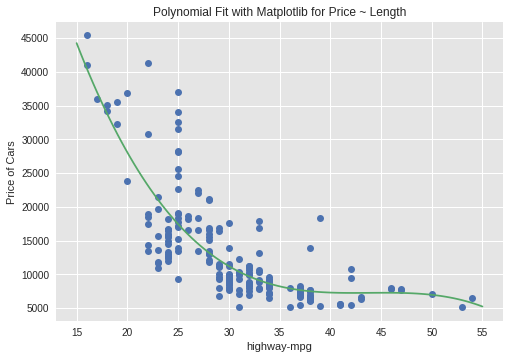

<Figure size 1440x720 with 0 Axes>

In [0]:
# use the following function to plot the data
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable, dependent_variabble, 'o', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.figure(figsize=(20, 10))

    plt.show()
    plt.close()
# get the variables
x = df['highway-mpg']
y = df['price']
# use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
# plot the function
PlotPolly(p, x, y, 'highway-mpg')

##3.4 Measures for In-Sample Evaluation

<p>When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.Two very important measures that are often used in Statistics to determine the accuracy of a model are:</p>

<b>R-squared</b>

<p>R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line.</p>
    
<p>The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.</p>



<b>Mean Squared Error (MSE)</b>

<p>The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).</p>

###3.4.1 Model 1: Simple Linear Regression

In [0]:
# calculate the R^2
x=df[['highway-mpg']]
y=df[['price']]
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x,y)
print('The R-square is: ',reg.score(x,y))

The R-square is:  0.4965911884339176


In [0]:
# compare the predicted results with the actual results
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, reg.predict(x))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639888


###3.4.2 Model 2: Multiple Linear Regression

In [0]:
# calculate the R^2
x=df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]
y=df[['price']]
from sklearn.linear_model import LinearRegression
reg=LinearRegression().fit(x,y)
print('The R-square is: ',reg.score(x,y))

The R-square is:  0.8093562806577457


In [0]:
# compare the predicted results with the actual results
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, reg.predict(x))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  11980366.87072649


###3.4.3 Model 3: Polynomial Fit

In [0]:
# calculate the R^2
x = df['highway-mpg']
y = df['price']
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
from sklearn.metrics import r2_score
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


In [0]:
# calculate the MSE
mse=mean_squared_error(df['price'], p(x))
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  20474146.426361218


##3.5 Decision Making


When comparing models, the model with the higher R-squared value is a better fit for the data, the model with the smallest MSE value is a better fit for the data.

**Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)**

<ul>
    <li><b>MSE</b>The MSE of SLR is  3.16x10^7  while MLR has an MSE of 1.2 x10^7.  The MSE of MLR is much smaller.</li>
    <li><b>R-squared</b>: In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (~0.497) is very small compared to the R-squared for the MLR (~0.809).</li>
</ul>
</p>

This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

**Simple Linear Model (SLR) vs Polynomial Fit**

<ul>
    <li><b>MSE</b>: We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.</li> 
    <li><b>R-squared</b>: The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.</li>
</ul>
<p>Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.</p>

**Multiple Linear Regression (MLR) vs Polynomial Fit**

<ul>
    <li><b>MSE</b>: The MSE for the MLR is smaller than the MSE for the Polynomial Fit.</li>
    <li><b>R-squared</b>: The R-squared for the MLR is also much larger than for the Polynomial Fit.</li>
</ul>

##Conclusion:

Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.





In [0]:
# only use numeric data
df=df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,aspiration-std,aspiration-turbo
0,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,1,0
1,3,122.0,88.6,0.811148,0.890278,0.816054,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,1,0
2,1,122.0,94.5,0.822681,0.909722,0.876254,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,1,0
3,2,164.0,99.8,0.848630,0.919444,0.908027,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,1,0
4,2,164.0,99.4,0.848630,0.922222,0.908027,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,1,0


In [0]:
# Libraries for plotting
import numpy as np
from IPython.display import display
from IPython.html import widgets
from ipywidgets import interact,interactive,fixed,interact_manual

/usr/local/lib/python3.6/dist-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [0]:
# functions for plotting
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [0]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

# 4.Model Evaluation and Refinement

We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are.

##4.1 Training and Testing

In [0]:
# split data into training and testing data
y_data = df['price']
x_data=df.drop('price',axis=1)

from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 31
number of training samples: 170


In [0]:
from sklearn.linear_model import LinearRegression
lre=LinearRegression()
lre.fit(x_train[['horsepower']], y_train)
lre.score(x_test[['horsepower']], y_test)
lre.score(x_train[['horsepower']], y_train)


0.6449517437659684

In [0]:
from sklearn.model_selection import cross_val_score
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


array([20254142.84026703, 43745493.26505169, 12539630.34014931,
       17561927.72247591])

In [0]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


##4.2 Overfitting, Underfitting and Model Selection

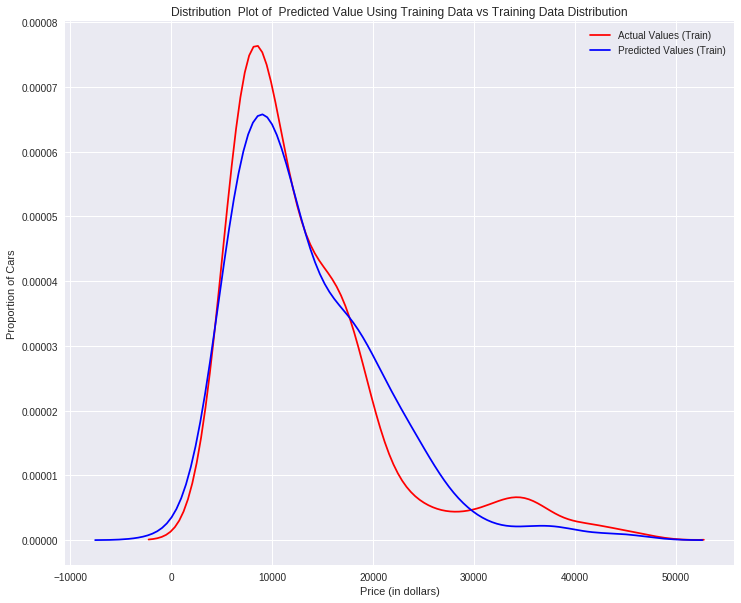

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

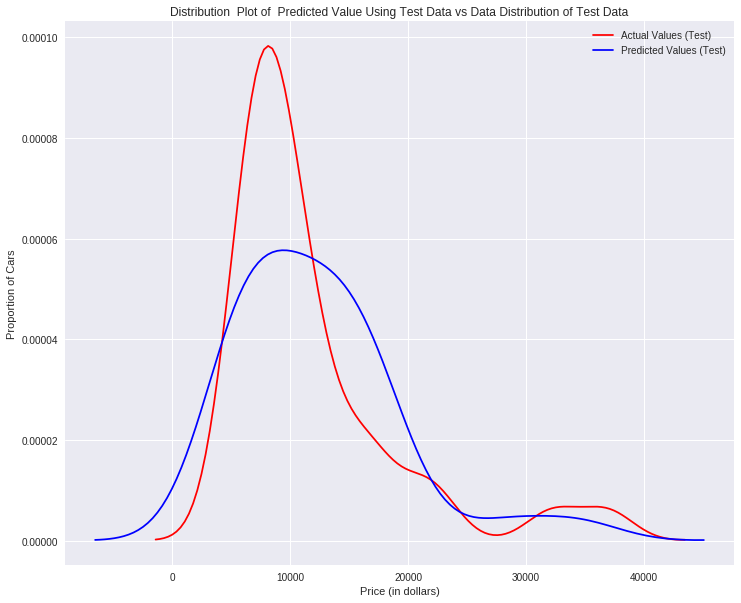

In [0]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [0]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)

In [0]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65563155,  7307.98783573, 12213.78771997, 18893.24801671,
       19995.95192244])

In [0]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65563155  7307.98783573 12213.78771997 18893.24801671]
True values: [ 6295. 10698. 13860. 13499.]


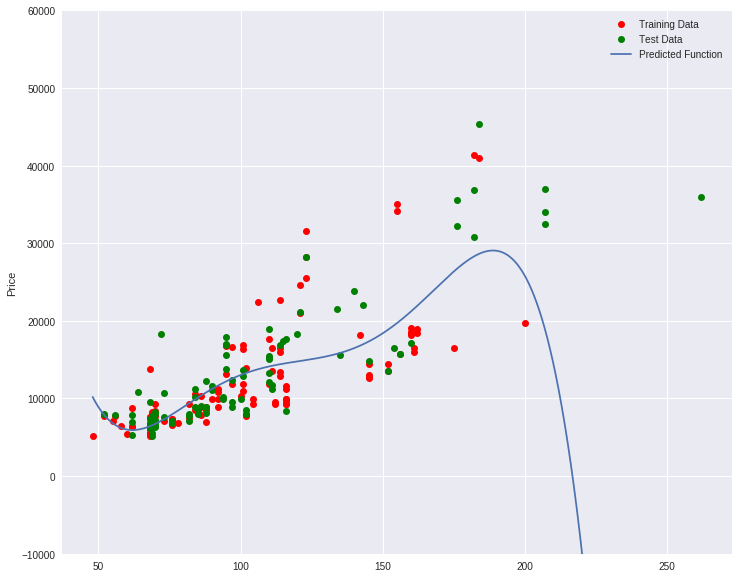

In [0]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [0]:
poly.score(x_train_pr, y_train)

0.5567716902120645

In [0]:
poly.score(x_test_pr, y_test)

-29.8713403824154

Text(3, 0.75, 'Maximum R^2 ')

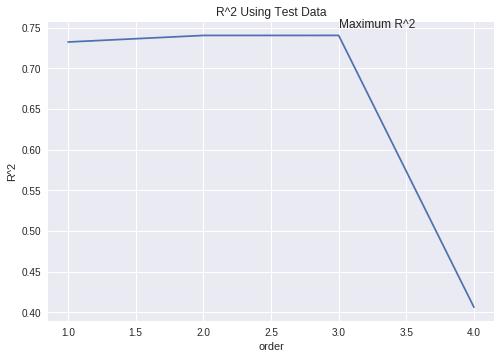

In [0]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [0]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [0]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f>

##4.3 Ridge regression

In [0]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [0]:
from sklearn.linear_model import Ridge
RigeModel=Ridge(alpha=0.1)
RigeModel.fit(x_train_pr, y_train)
yhat = RigeModel.predict(x_test_pr)
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set : [ 6295. 10698. 13860. 13499.]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.029716e-16
  overwrite_a=True).T


In [0]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = 10 * np.array(range(0,1000))
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

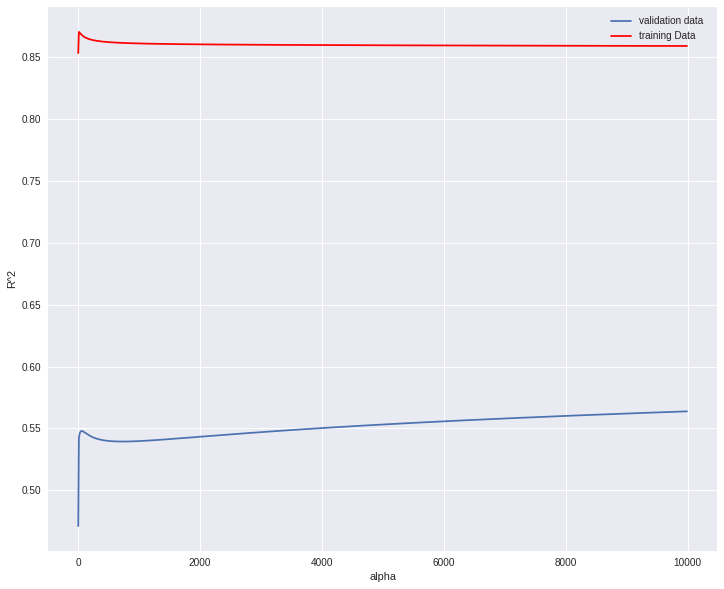

In [0]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

##4.4 Grid Search

In [0]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

In [0]:
# test our model on the test data
BestRR=Grid1.best_estimator_
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036152